## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
# Import Pandas and Numpy to deal with DataFrames and NaN
import pandas as pd
import numpy as np

# Import MatPlotLib and Seaborn to help visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Import os for file reader
import os

In [2]:
# Get current working directory
current_directory = os.getcwd()
print(current_directory)

/Users/brandonrose/Midterm_Project


In [3]:
# Pull the data from csv by concatenating current working directory with
# '/data/flights_10000.csv'
data = pd.read_csv(current_directory +'/data/flights_10000.csv')
passengers = pd.read_csv(current_directory +'/data/passengers_10000.csv')

In [4]:
data.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
data['no_name'].value_counts()

Series([], Name: no_name, dtype: int64)

In [6]:
data.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [7]:
data.drop(['Unnamed: 0', 'no_name'], axis=1, inplace=True)

In [8]:
data.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,1.0,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,1.0,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN


## **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

<AxesSubplot:xlabel='arr_delay', ylabel='dep_delay'>

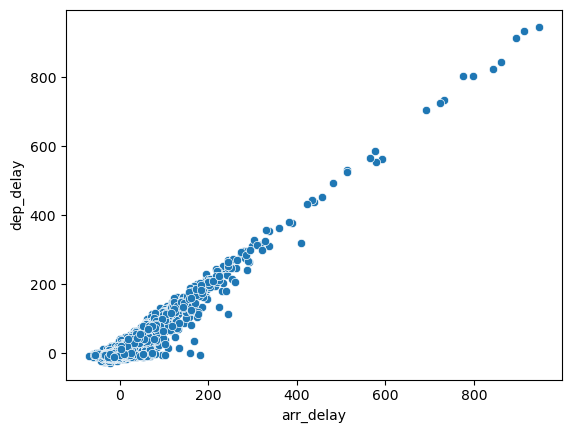

In [115]:
sns.scatterplot(data, x='arr_delay', y='dep_delay')

In [143]:
# Isolate the rows that ONLY have an arrival or departure delay
delay_times = data[((data['arr_delay'] > 0) & (data['arr_delay'] < 400)) | ((data['dep_delay'] > 0) & (data['dep_delay'] < 400))].reset_index()

<AxesSubplot:xlabel='arr_delay', ylabel='dep_delay'>

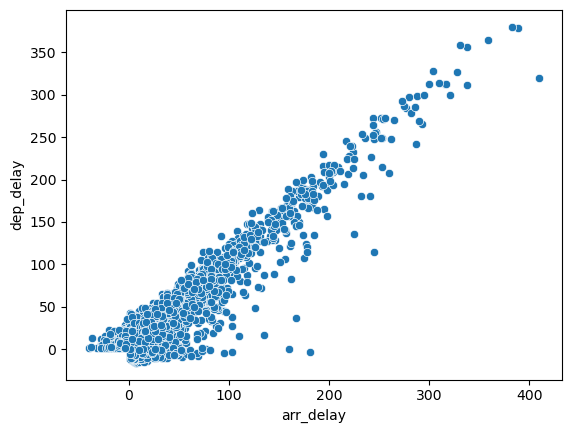

In [144]:
sns.scatterplot(delay_times, x='arr_delay', y='dep_delay')

In [168]:
# Isolate the delay times
delays_only_df = delay_times.loc[:, ['arr_delay', 'dep_delay']]

In [169]:
delays_only_df.head()

,arr_delay,dep_delay
0,8.0,6.0
1,28.0,-1.0
2,29.0,39.0
3,10.0,-2.0
4,1.0,13.0


In [170]:
delays_only_df.shape

(4298, 2)

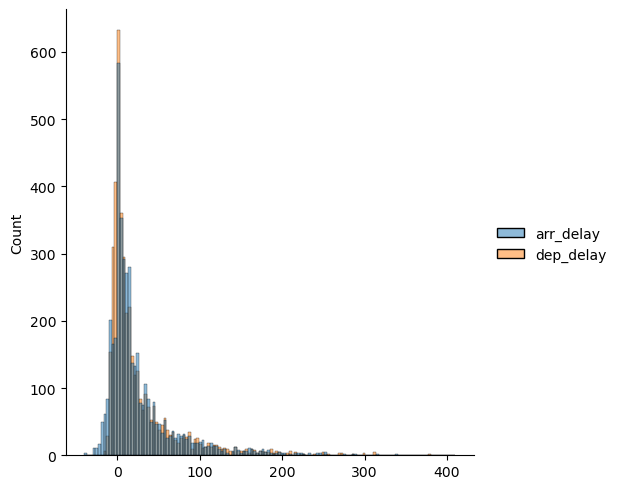

In [171]:
sns.displot(delays_only_df)

In [172]:
# We will run a t_test on this large dataset
# First, we need to remove rows with 0s
delays_only_df = delays_only_df.loc[(delays_only_df != 0).any(axis=1)]

In [175]:
# import Kolmogorov–Smirnov test from scipy as data is heavily skewed
from scipy.stats import kstest

In [177]:
# calculate kstest using arr_delay and dep_delay
res = kstest(delays_only_df['arr_delay'],delays_only_df['dep_delay'])

In [178]:
res

KstestResult(statistic=0.05909725453699395, pvalue=6.010690716756964e-07)

Based on these results, we feel that the null hypothesis stands that delays are from normal distribution.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [25]:
# List data columns for reference
data.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [26]:
# First, we can convert the column dtype for the date from Object to datetime64
data['fl_date'] = pd.to_datetime(data['fl_date'])

In [27]:
# Create DF with year column, delay columns, diverted and cancellation
df_delays = data.loc[:, ['fl_date', 'dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'diverted', 'cancelled']]
df_delays.head(10)

,fl_date,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,diverted,cancelled
0,2018-07-10,-3.0,-2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2019-10-10,-3.0,-9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019-07-18,6.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2018-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4,2018-10-24,-1.0,28.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0
5,2019-06-08,-2.0,-7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,2018-01-29,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,2019-08-14,39.0,29.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0
8,2019-01-28,-11.0,-9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
9,2018-03-05,-5.0,-12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [28]:
df_delays['fl_date'].dt.year.value_counts()

2019    5123
2018    4877
Name: fl_date, dtype: int64

In [29]:
# Check dtypes
df_delays.dtypes

fl_date                datetime64[ns]
dep_delay                     float64
arr_delay                     float64
carrier_delay                 float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
diverted                      float64
cancelled                     float64
dtype: object

In [30]:
# We know everything is numeric, so we can fill NaN with 0s
df_delays = df_delays.fillna(0)

In [31]:
# Group by year, month. Calculate sum for the departure and arrival delay columns. Include delay type columns for more insight.
delays_grouped = df_delays.groupby([df_delays['fl_date'].dt.year.rename('Year'),
                                    df_delays['fl_date'].dt.month.rename('Month')])[['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', ]].sum().reset_index()

In [32]:
#store the mean of our delay totals in a new column for each month
delays_grouped['month_delay_avg'] = delays_grouped[['dep_delay', 'arr_delay']].mean(axis=1)

In [33]:
#Sort DataFrame based on new month_delay_avg column in descending order
print("Delay Times in Minutes:")
delays_grouped[['Year', 'Month', 'month_delay_avg']].sort_values(['Year', 'month_delay_avg'], ascending=False)

Delay Times in Minutes:


,Year,Month,month_delay_avg
18,2019,7,6254.0
13,2019,2,5310.0
17,2019,6,4974.0
16,2019,5,4132.0
12,2019,1,3936.0
23,2019,12,3662.5
14,2019,3,3538.5
19,2019,8,3159.5
15,2019,4,2709.5
21,2019,10,2519.5


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [34]:
#Define a taxi dataframe that only has relevant information
#Drop NaN to remove cancellation flights
df_taxi = data.loc[:,['tail_num', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time']].dropna().reset_index()

In [35]:
#Check head
df_taxi.head()

,index,tail_num,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,arr_time
0,0,N958WN,702.0,13.0,715.0,907.0,6.0,913.0
1,1,N68811,757.0,20.0,817.0,1131.0,8.0,1139.0
2,2,N694AE,1040.0,17.0,1057.0,1125.0,13.0,1138.0
3,4,N693DL,840.0,45.0,925.0,1056.0,11.0,1107.0
4,5,N250NN,1147.0,19.0,1206.0,1342.0,11.0,1353.0


In [36]:
# Import function that determines time of day based on arr_time and dep_time columns
from src.modules.data_preprocessing import time_of_day

In [37]:
#New column to categorize Morning, Afternoon, Evening, Nite
df_taxi['dep_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='dep'), axis=1)
df_taxi['arr_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='arr'), axis=1)

In [38]:
df_taxi.head()

,index,tail_num,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,dep_time_of_day,arr_time_of_day
0,0,N958WN,702.0,13.0,715.0,907.0,6.0,913.0,Morning,Morning
1,1,N68811,757.0,20.0,817.0,1131.0,8.0,1139.0,Morning,Morning
2,2,N694AE,1040.0,17.0,1057.0,1125.0,13.0,1138.0,Morning,Morning
3,4,N693DL,840.0,45.0,925.0,1056.0,11.0,1107.0,Morning,Morning
4,5,N250NN,1147.0,19.0,1206.0,1342.0,11.0,1353.0,Morning,Afternoon


In [39]:
df_taxi['dep_time_of_day'].value_counts()

Morning      4026
Afternoon    2806
Evening      2188
Night         813
Name: dep_time_of_day, dtype: int64

In [40]:
#Add a counter column to return a count of flights in our groupby 
df_taxi['counter'] = 1

In [41]:
df_taxi.head()

,index,tail_num,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,dep_time_of_day,arr_time_of_day,counter
0,0,N958WN,702.0,13.0,715.0,907.0,6.0,913.0,Morning,Morning,1
1,1,N68811,757.0,20.0,817.0,1131.0,8.0,1139.0,Morning,Morning,1
2,2,N694AE,1040.0,17.0,1057.0,1125.0,13.0,1138.0,Morning,Morning,1
3,4,N693DL,840.0,45.0,925.0,1056.0,11.0,1107.0,Morning,Morning,1
4,5,N250NN,1147.0,19.0,1206.0,1342.0,11.0,1353.0,Morning,Afternoon,1


In [42]:
departure_group = df_taxi.groupby('dep_time_of_day')[['taxi_out', 'counter']].sum().reset_index()

In [43]:
departure_group.sort_values('taxi_out', ascending=False)

,dep_time_of_day,taxi_out,counter
2,Morning,70834.0,4026
0,Afternoon,47708.0,2806
1,Evening,39977.0,2188
3,Night,13536.0,813


In [44]:
arrival_group = df_taxi.groupby('arr_time_of_day')[['taxi_in', 'counter']].sum().reset_index()

In [45]:
arrival_group.sort_values('taxi_in', ascending=False)

,arr_time_of_day,taxi_in,counter
2,Morning,23260.0,2892
0,Afternoon,20960.0,2867
1,Evening,17708.0,2239


### Our Findings
We found through this exploration that taxi times are longest in the mornings for both arrivals and departures. However, the data suggests that departure taxi times are higher overall, with the morning being considerable longer than the rest of our time of day data for both arrivals *and* departures. 
<br>
<br>
There does seem to be a considerable correlation with morning taxi times, as the highest count of flights based on time of day was over 4000 flights for morning departures, a good 1100 more than any other time of day for both arrivals and departures.

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [46]:
# New DF from data
flight_df = pd.read_csv('data/flights_10000.csv')
flight_df.shape

(10000, 43)

In [47]:
data['fl_date'].describe()

/var/folders/x9/6n919l0d4kz2zjx2vkr6n41w0000gn/T/ipykernel_12125/2443660879.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['fl_date'].describe()


count                   10000
unique                    730
top       2018-03-09 00:00:00
freq                       29
first     2018-01-01 00:00:00
last      2019-12-31 00:00:00
Name: fl_date, dtype: object

In [48]:
flight_df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [49]:
#columns for 
flight_df['year'] = data['fl_date'].dt.year
flight_df['month'] = data['fl_date'].dt.month

In [50]:
# define passenger data
pass_df = pd.read_csv('data/passenger_master.csv', index_col=0)
pass_df.shape

(630458, 38)

In [51]:
# data merge on common columns
busy_df = flight_df.merge(pass_df, how='inner', on=['origin', 'origin_city_name', 'origin_airport_id', 'dest', 
                                                    'dest_city_name', 'dest_airport_id', 'distance', 
                                                    'year', 'month'])
busy_df.shape

(57889, 74)

In [52]:
origin_group = busy_df.groupby(['origin', 'year', 'month'])[['flights', 'passengers']].sum()

In [53]:
origin_group.index.names = ['airport', 'year', 'month']

In [54]:
origin_df = pd.DataFrame(origin_group).sort_values(['flights','passengers'], ascending=False)

In [55]:
origin_df

flights  passengers
airport year month                     
ORD     2018 6        318.0   1379841.0
        2019 11       301.0   1022869.0
LAX     2019 12       261.0   1319686.0
             11       245.0   1123927.0
ORD     2018 9        245.0    568368.0
...                     ...         ...
JHM     2018 3          1.0         0.0
             5          1.0         0.0
             10         1.0         0.0
LAN     2018 5          1.0         0.0
LNY     2018 5          1.0         0.0

[2726 rows x 2 columns]

In [56]:
dest_group = busy_df.groupby(['dest', 'year', 'month'])[['flights', 'passengers']].sum()

In [57]:
dest_group.index.names = ['airport', 'year', 'month']

In [58]:
dest_df = pd.DataFrame(dest_group).sort_values(['flights','passengers'], ascending=False)

In [59]:
dest_df

flights  passengers
airport year month                     
ORD     2019 10       288.0   1153848.0
             12       288.0    895925.0
             6        267.0   1051047.0
             8        259.0    934305.0
        2018 10       240.0    664720.0
...                     ...         ...
PNS     2019 5          1.0       122.0
PGV     2018 6          1.0        32.0
GUM     2018 4          1.0        16.0
MVY     2019 6          1.0         4.0
BQK     2019 4          1.0         0.0

[2770 rows x 2 columns]

In [60]:
#Concatenate into one df
airport_df = pd.concat([origin_df, dest_df]).groupby(['airport']).sum()

In [61]:
top_ten_pass = airport_df.sort_values(['passengers'], ascending=False).head(10)
top_ten_pass

,flights,passengers
airport,,
ATL,6696.0,35628746.0
LAX,6677.0,34476018.0
ORD,9385.0,30280979.0
DEN,6706.0,24516842.0
SFO,3998.0,20258202.0
SEA,3730.0,17998091.0
DFW,3800.0,16959539.0
LAS,3205.0,16758350.0
LGA,2554.0,13725121.0


In [62]:
top_ten_flights = airport_df.sort_values(['flights'], ascending=False).head(10)
top_ten_flights

,flights,passengers
airport,,
ORD,9385.0,30280979.0
DEN,6706.0,24516842.0
ATL,6696.0,35628746.0
LAX,6677.0,34476018.0
SFO,3998.0,20258202.0
DFW,3800.0,16959539.0
SEA,3730.0,17998091.0
LAS,3205.0,16758350.0
EWR,3086.0,10802100.0


### Conclusions:
This is a list of the top 10 busiest airports by both total flights and total passengers. As can be seen above, flights vs passengers is slightly ambiguous when it comes to defining the 'busiest' airport.

In [63]:
pass_avg_traffic = round((top_ten_pass.passengers.sum()/airport_df.passengers.sum())*100, 2)

In [64]:
print (f'The top ten airports (by passengers) make up {pass_avg_traffic}% of total pedestrian traffic.')

The top ten airports (by passengers) make up 47.9% of total pedestrian traffic.


In [65]:
flight_avg_traffic = round((top_ten_flights.flights.sum()/airport_df.flights.sum())*100, 2)

In [66]:
print (f'The top ten airports (by flights) make up {flight_avg_traffic}% of total domestic plane traffic.')

The top ten airports (by flights) make up 43.44% of total domestic plane traffic.


#### Some extra flavour
because the question is ambiguous, here is some other data that can be visualized to compare different definitions of 'busy'.

In [67]:
# The Busiest Month
# Group by Month
airport_df2  = pd.concat([origin_df, dest_df]).groupby(['month']).sum()

In [68]:
# Sort by passengers
airport_df2.sort_values(['passengers'], ascending=False).head(10)

,flights,passengers
month,,
8,10612.0,47701902.0
7,9510.0,42618296.0
10,10180.0,42601050.0
6,10046.0,41920746.0
5,8986.0,41262804.0
4,9982.0,40496114.0
11,10404.0,38776106.0
12,10430.0,38081566.0
3,9332.0,38024642.0


In [69]:
# Sort by flights 
airport_df2.sort_values(['flights'], ascending=False).head(10)

,flights,passengers
month,,
8,10612.0,47701902.0
12,10430.0,38081566.0
11,10404.0,38776106.0
10,10180.0,42601050.0
6,10046.0,41920746.0
4,9982.0,40496114.0
7,9510.0,42618296.0
3,9332.0,38024642.0
5,8986.0,41262804.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?